<h1> Комментарий ревьюера </h1>

Привет, Александр!
Меня зовут Виктория Ильина, и я буду проверять твой проект. Предлагаю общаться на "ты", но если тебе будет не комфортно, обязательно сообщи и мы перейдем на "вы". 

Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе стать специалистом по Data Science. Ты уже проделал большую работу над проектом, но давай сделаем его ещё лучше. Ниже ты найдёшь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать различные цвета, чтобы было легче воспринимать мои комментарии:

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Однако, если перед нами стоит цель не просто сдать проект и забыть, а приобрести новые знания и успешно применять их в будущем, я бы всё-таки рекомендовала тебе прорабатывать эти недочёты.
</div>
    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Так я выделю все остальные комментарии.
</div>
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

Давай посмотрим, что получилось!

# Восстановление золота из руды

---

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Предоставлены данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


---

# Содержание проекта
1. [Знакомство с данными](#1)
2. [Проверка корректности расчета эффективности обогащения](#2)
3. [Определение признаков, недоступных в тестовой выборке](#3)
4. [Предобработка данных](#4)
    * [Формирование признаков](#4_1)
    * [Исправление некорректного типа данных](#4_2)
    * [Обработка пропусков](#4_3)
5. [Исследовательская часть](#5)
    * [Как меняется концентрация металлов](#5_1)
    * [Сравнение распределений](#5_2)
    * [Исследование суммарной концентрации](#5_3)
6. [Обучение моделей][#6]
    * [Реализация метрики sMAPE](#6_1)
    * [Обучение модели](#6_2)
    * [Финальное тестирование модели](#6_3)
    * [Проверка на адекватность](#6_4)
7. [Общий вывод](#7)
---

In [1]:
# импорт всех необходимых модулей
# импорт модулей для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
# настройка отображения количества столбцов
pd.set_option('display.max_rows', 100)
plt.rcParams.update({'font.size': 15})
# для метрик оценки качества
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
# для МашОба
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Все библиотеки можно и нужно импортировать в одной ячейке =)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Вика, спасибо за комментарий, но вопрос: почему все-таки нужно импортировать библиотеки в одной ячейке? Мне просто кажется, что так проще и удобнее смотреть на то, что и зачем ты импортируешь. Но я не знаю возможных проблем при раздробленном импортировании библиотек. Предполагаю, что возможны конфликты) 
Если не прав, то прошу ответить на этот вопрос)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Мне кажется, что это больше вопрос к оформлению, чем к функционалу. Если делать импортирование не в начале, а в течение всего проекта, да есть риск, что какие-то библиотеки вместе не контачат и придётся возвращаться к началу, но если импортировать подряд в начале, то ошибка вылезет сразу. Поэтому мне кажется, что всё-таки это больше вопрос к лаконичности кода
</div>

## Знакомство с данными <a id="1"></a>

Для начала загрузим данные, которая предоставила компания. 

Известны следующие наборы данных:

Обучающая выборка:

In [4]:
try:
    train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
except:
    train = pd.read_csv('gold_recovery_train_new.csv')

Тестовая выборка:

In [5]:
try:
    test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
except:
    test = pd.read_csv('gold_recovery_test_new.csv')

Исходные данные (представляют собой обучающую и тестовую выборки со всеми признаками):

In [6]:
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')
except:
    df = pd.read_csv('gold_recovery_full_new.csv')

Теперь познакомимся с этими данными:

In [7]:
def info(df: pd.DataFrame):
    display(df.head());
    df.info();

Обучающие данные:

In [8]:
info(train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Тестовые данные:

In [9]:
info(test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Исходные данные:

In [10]:
info(df)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Видим, что признаков у нас много, при этом видим, что у нас данные представляют из себя определенные этапы, процессы и параметры при обработке руды. 

Для того, чтобы понять суть этих признаков рассмотрим дополнительную информацию от заказчика:

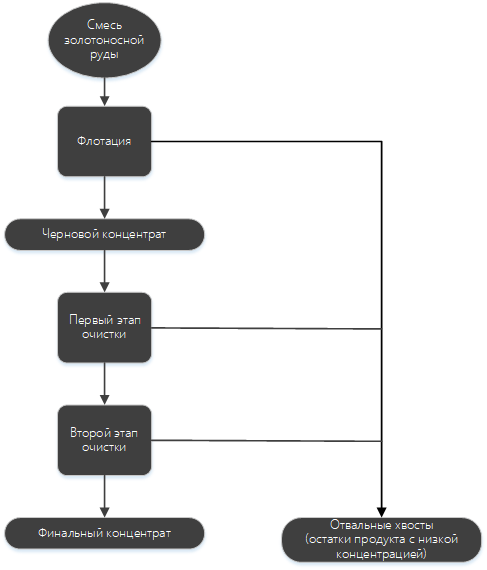

На рисунке представлены стадии процесса получения золота из руды.

Руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

* **Флотация**:
во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов. 

* **Очистка**: 
черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

Из дополнительной информации заказчика известно, что данные заполняются в следующей форме:

`[этап].[тип параметра].[название параметра]`

Составим таблицу из предполагаемых значений в наших данных.

|**`[этап].`**|**`[тип параметра].`**|**`[название параметра]`**|
|--------|-----------------|----------------------|
|||**Параметры этапов (относится к `state`)**|
|`rougher ` - флотация|`input` - параметры сырья|`air amount` - объем воздуха|
|`primary_cleaner` - первичная очистка|`output` - параметры продукта|`fluid levels` - объем жидкости|
|`secondary_cleaner` - вторичная очистка|`state` - параметры, хар-ие текущее состояние этапа|`feed size` - размер зерна|
|`final` - финальные характеристики|`calculation` - расчетные характеристики|`feed rate` - скорость подачи|
|||**Технологический процесс(дополнительная расшифровка):**|
|||`Rougher feed` - исходное сырье|
|||**флотационные реагенты (Xanthate, Sulphate, Depressant):**|
|||`Xanthate` - ксантогенат|
|||`Sulphate` - сульфат|
|||`Depressant` - депрессант|
|||`Rougher process` - флотация|
|||`Rougher tails` - отвальные хвосты|
|||`Float banks` - флотационная установка|
|||`Cleaner process` - очистка|
|||`Rougher Au` - черновой концентрат золота|
|||`Final Au` - финальный концентрат золота|

Из дополнительной информации заказчика известна схема индексации данных:

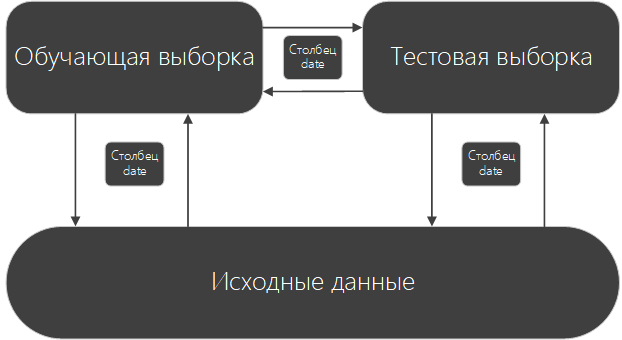

## Вывод

В процессе знакомства с данными сделали следующее:


*   Познакомились с обучающими, тестовыми и исходными данными;
*   Определили основные этапы процесса добычи золота из руды;
*   Из дополнительной информации определили, какие данные предоставил заказчик и из чего состоят эти данные;
* Как индексируются предоставленные наборы данных.

Однако в результате наблюдения за данными обнаружили следующие проблемы:

* Имеются пропуски во всех наборах данных. Небходимо выбрать подходящий метод для заполнения пропусков в наблюдениях;
* Количество признаков в тестовой и обучающей выборках отличаются. Количество признаков в тестовой выборке - 52, количество признаков в обучающей - 86. Необходимо разобраться, каки данные отсутствуют в тестовой выборке, сравнив с обучающей, а также понять, что делать в такой ситуации;
* Во всех данных имеется некорректный тип данных столбца `date`. Необходимо привести его к соответствующему типу.




После того, как познакомились с данными, проверим корректность предоставленных данных.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Всё очень последовательно и наглядно
</div>
    

## Проверка корректности расчета эффективности обогащения <a id="2"></a>

Эффективность обогащения расчитывается по формуле:

$$Recovery = \frac{C \cdot (F - T)}{F \cdot (C - T)} \cdot 100\% $$

Где:

$C$ - доля золота в концентрате после флотации/очистки;

$F$ - доля золота в сырье/концентрате до флотации/очистки;

$T$ - доля золота в отвальных хвостах после флотации/очистки


Теперь определим, какие признаки будем использовать для расчета. Важно учесть следующее: у нас есть два целевых признака, которые необходимо спрогнозировать:

* Эффективность обогащения чернового концентрата;
* Эффективность обогащения финального концентрата.

Поэтому чтобы убедиться в том, что модель будет корректно прогнозировать эффективности обогащения, нужно убедиться в том, что полученные данные от заказчика представлены верно. Для этого нужно посчитать по полученным от заказчика признакам посчитать значение $Recovery$. А затем посчитать, насколько полученное значение отличается от того, что заказчик передал.

При это важно определить, что нужно использовать для расчета. 

Рассмотрим данные подробнее.

Доля золота в концентрате после флотации/очистки - это то, что мы получаем в результате флотации (`Rougher output` / `Final output`) т.е. черновой концентрат. Для этого подойдет параметр `rougher.output.concentrate_au` (черновой концентрат). А для финального концентрата возьмем параметр `final.output.concentrate_au`

Доля золота в сырье/концентрате до флотации/очистки - то, что мы подаем на вход флотации (`Rougher input`). Для этого возьмем признак `rougher.input.feed_au`.

Доля золота в отвальных хвостах после флотации/очистки - то, что мы отфильтровали в результате флотации (`Rougher output tail` / `Final output tail`). Для этого подойдет параметр `rougher.output.tail_au` (черновой концентрат). А для финального концентрата - `final.output.tail_au`

Таким образом, определили следующие признаки, которые будем использовать при расчете коэффициента эффективности:

|**Черновой концентрат**|**Финальный концентрат**|
|-----------------------|------------------------|
|$C_{rougher}$ - `rougher.output.concentrate_au`|$C_{final}$ - `final.output.concentrate_au`|
|$F_{rougher}$ - `rougher.input.feed_au`|$F_{final}$ - `rougher.input.feed_au`|
|$T_{rougher}$ - `rougher.output.tail_au`|$T_{final}$ - `final.output.tail_au`|

Теперь приступим к расчету коэффициента эффективности. Сначала посмотрим на результаты, полученные для чернового концентрата, а затем - для итоговой (после того, как сырье прошло все этапы очистки)

In [11]:
def mae(df: pd.DataFrame,
        res : str):
    if res == 'rougher':
        df_recovery = df[['rougher.output.concentrate_au', 
                     'rougher.input.feed_au', 
                     'rougher.output.tail_au', 
                     'rougher.output.recovery']].copy()
        check_value = df_recovery['rougher.output.recovery']
        C = df_recovery['rougher.output.concentrate_au']
        F = df_recovery['rougher.input.feed_au']
        T = df_recovery['rougher.output.tail_au']
    elif res == 'final':
        df_recovery = df[['final.output.concentrate_au', 
                     'rougher.input.feed_au', 
                     'final.output.tail_au',
                     'final.output.recovery']].copy()
        check_value = df_recovery['final.output.recovery'] 
        C = df_recovery['final.output.concentrate_au']
        F = df_recovery['rougher.input.feed_au']
        T = df_recovery['final.output.tail_au']
    print_res(C,F,T, check_value, res)
               

In [12]:
def print_res(C: pd.Series, 
              F: pd.Series, 
              T: pd.Series,
              s_check: pd.Series, 
              res: str):
    result = pd.Series((C*(F - T)) / (F*(C - T)) * 100)
    mae = mean_absolute_error(result, s_check)
    if res == 'rougher':
        res = 'черновой концентрации'
    elif res == 'final':
        res = 'финальной концентрации'
    print(f'MAE {res}: {mae}')

Для чернового концентрата:

In [13]:
mae(train, 'rougher')

MAE черновой концентрации: 9.73512347450521e-15


Для финального концентрата:

In [14]:
mae(train, 'final')

MAE финальной концентрации: 8.538049763979541e-15


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Верно, полученное значение оказалось в достаточной степени маленьким, чтобы можно было утверждать о правильности расчёта
</div>


Как видим, среднее абсолютное отклонение для чернового и финального концентраций практически равны нулю. Это означает, что предоставленные расчет от заказчика значения $Recovery$ верны.

Теперь посмотрим на дисбаланс признаков для каждой выборки. 

## Определение признаков, недоступных в тестовой выборке. <a id="3"></a>

Из знакомства с данными заметили, что количество признаков в тестовой выборке меньше, чем вы обучающей.

Напомним:

* Тестовая выборка - 52 признака;
* Обучающая выборка - 86 признаков.

Определим, какие признаки оказались недоступными для тестовой выборки.

In [15]:
# можно посчитать так:
#train.columns[~train.columns.isin(test.columns)]
# а можно через множества (результат преобразовываем в список)
missed_columns = list(set(train) - set(test))

In [16]:
# для удобства отсортируем полученные результаты
# сортировка по возрастанию по первой букве элемента списка
missed_columns = sorted(missed_columns, key = lambda x: x[0])

In [17]:
# вывел всего 5 элемента из сформированного списка
# для красоты
missed_columns[:5]

['final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.concentrate_pb']

Посмотрим, к каким типам относятся признаки, недоступные в тестовой выборке:

In [18]:
train[missed_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_au                         14149 non-null  float64
 1   final.output.tail_ag                                14149 non-null  float64
 2   final.output.tail_pb                                14049 non-null  float64
 3   final.output.tail_sol                               14144 non-null  float64
 4   final.output.concentrate_pb                         14148 non-null  float64
 5   final.output.concentrate_sol                        13938 non-null  float64
 6   final.output.tail_au                                14149 non-null  float64
 7   final.output.recovery                               14149 non-null  float64
 8   final.output.concentrate_ag                         14148 non-null  float64


Видим, что признаки, недоступные в тестовой выборке это:

* расчетные характеристики `calculation`;
* параметры продукта на всех этапах процесса `output`.

Все признаки, недоступные в тестовой выборке имеют тип `float` - с плавающей точкой. Эти признаки недоступны в данном наборке данных, так как эти параметры замеряются или расчитываются позже. Также в тестовой выборке отсутствуют целевые признаки:

* эффективность обогащения чернового концентрата `rougher.output.recovery`;
* эффективность обогащения итогового концентрата `final.output.recovery`.


## Вывод

В процессе проверки наборов данных определили следующее:

* Расчеты эффективности для чернового и финального концентратов расчитаны корректно: среднее абсолютное отклонение очень мало, чтобы говорить, что разница между расчетными и полученными данными значительны.
* В тестовом наборе данных отсутствуют расчетные характеристики и параметры продукта на всех этапах процесса. Все признаки имеют тип `float`.
* В тестовом наборе данных нет целевых признаков, по которым будем обучать наши модели.
* Во всех наборах данных имеются пропуски.
* Тип данных столбца `date` представлен некорректно, необходимо привести к соответствующему типу.

В итоге, представленные данные не готовы для дальнейшего исследования и обучения моделей. Необходимо провести предобработку данных.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Абсолютно верно =)
</div>
    

## Предобработка данных <a id="4"></a>

### Формирование необходимых признаков для работы с моделями <a id="4_1"></a>

Прежде всего, в тестовой выборке отсутствуют целевые признаки, по которым предстоит сделать финальное тестирование выбранной модели. При этом в обучающей выборке имеются лишние для обучения признаки, которые отсутсвуют в тестовом наборе данных.

Напомним следующую информацию:

* Целевые признаки:
    * эффективность обогащения чернового концентрата `rougher.output.recovery`;
    * эффективность обогащения финального концентрата `final.output.recovery`.
* Объем данных:
    * количество признаков в исходной тестовой выборке: 53;
    * количество признаков в исходной обучающей выборке: 87.
    
Схема индексации данных:

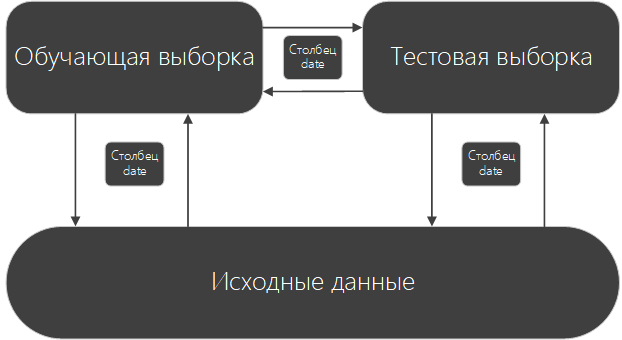

Для этого возьмем из исходных данных значения целевых признаков и добавим их в тестовую выборку. А в обучающей выборке удалим все признаки, которых нет в тестовой выборке.

In [19]:
# Добавление целевых признаков 
# В тестовую выборку
# Ключ - столбец date
# соединение left - берем только те значения date, которые есть в тестовой выборке
test = test.merge(df[['rougher.output.recovery', 'final.output.recovery','date']], on = 'date', how = 'left')

In [20]:
test[['rougher.output.recovery', 'final.output.recovery', 'date']].head()

,rougher.output.recovery,final.output.recovery,date
0,89.993421,70.273583,2016-09-01 00:59:59
1,88.089657,68.910432,2016-09-01 01:59:59
2,88.412756,68.143213,2016-09-01 02:59:59
3,87.360133,67.776393,2016-09-01 03:59:59
4,83.236367,61.467078,2016-09-01 04:59:59


Целевые признаки добавлены в тестовую выборку. Теперь избавимся от лишних признаков в обучающей выборке:

In [21]:
train = train[test.columns]

In [22]:
train.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


Посмотрим на итоговый набор данных для наших выборок (количество строк и столбцов):

In [23]:
print(f'Test size: {test.shape}')
print(f'Train size: {train.shape}')

Test size: (5290, 55)
Train size: (14149, 55)


В тестовую выборку добавили целевые признаки, а в обучающем наборе данных избавились от лишних данных (те, которые отсутствовали в тестовой выборке изначально). 

Продолжим дальнейшую предобработку данных.

### Исправление некорректного типа данных <a id="4_2"></a>

Для начала приведем столбцы `date` к соответствующему типу (`DateTime`).

In [24]:
# обучающая выборка
train.date = pd.to_datetime(train.date, format = '%Y-%m-%d %H:%M:%S')
# тестовая выборка
test.date = pd.to_datetime(test.date, format = '%Y-%m-%d %H:%M:%S')
# исходные данные
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %H:%M:%S')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Проверим корректность выполнения преобразования типа данных:

In [25]:
# обучающая выборка
print(f'Train date type: {train.date.dtype}')
# тестовая выборка
print(f'Test date type: {test.date.dtype}')
# исходные данные
print(f'Df date type: {df.date.dtype}')

Train date type: datetime64[ns]
Test date type: datetime64[ns]
Df date type: datetime64[ns]


Тип данных приведен корректно. Приступим к обработке пропусков.

### Обработка пропусков <a id="4_3"></a>

Посмотрим на доли пропусков в каждом наборе данных, а также выведем максимальную долю пропусков в каждом наборе данных:

In [26]:
# обучающая выборка
print(train.isna().mean())
print(f'isna() max: {train.isna().mean().max()}')

date                                          0.000000
primary_cleaner.input.sulfate                 0.001414
primary_cleaner.input.depressant              0.002262
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.007068
primary_cleaner.state.floatbank8_a_air        0.000283
primary_cleaner.state.floatbank8_a_level      0.000071
primary_cleaner.state.floatbank8_b_air        0.000283
primary_cleaner.state.floatbank8_b_level      0.000071
primary_cleaner.state.floatbank8_c_air        0.000141
primary_cleaner.state.floatbank8_c_level      0.000071
primary_cleaner.state.floatbank8_d_air        0.000212
primary_cleaner.state.floatbank8_d_level      0.000071
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.007068
rougher.input.feed_rate                       0.000565
rougher.input.feed_size                       0.010177
rougher.input.feed_sol                        0.005513
rougher.in

In [27]:
# тестовая выборка
print(test.isna().mean())
print(f'isna() max: {test.isna().mean().max()}')

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

In [28]:
# исходные данные
print(df.isna().mean())
print(f'isna() max: {df.isna().mean().max()}')

date                                                  0.000000
final.output.concentrate_ag                           0.000051
final.output.concentrate_pb                           0.000051
final.output.concentrate_sol                          0.010854
final.output.concentrate_au                           0.000000
final.output.recovery                                 0.000000
final.output.tail_ag                                  0.000051
final.output.tail_pb                                  0.005196
final.output.tail_sol                                 0.000309
final.output.tail_au                                  0.000000
primary_cleaner.input.sulfate                         0.001235
primary_cleaner.input.depressant                      0.001903
primary_cleaner.input.feed_size                       0.000000
primary_cleaner.input.xanthate                        0.005350
primary_cleaner.output.concentrate_ag                 0.000000
primary_cleaner.output.concentrate_pb                 0

Видим, что у нас есть пропуски, чья доля меньше 1%, а есть признаки, где доля пропусков представляет собой приблизительно 10% значений. Наибольшая доля пропусков из набора данных представлена в исходных данных. В этом наборе есть признак, у которого доля пропусков равна 8%. 

Возможны следующие способы борьбы с пропусками:

* Заполнение нестандартным значением;
* Удалить эти пропуски, так как доля пропусков в необходимых для машинного обучения представляет собой приблизительно 3%. И это незначительно исказит предоставленные результаты;
* Заполнить ближайшим значением

Из дополнительной информации заказчка:
> Соседние по времени параметры часто похожи.

Отсюда, можно предположить, что заполнение пропуска ближайшим к пропуску значением - наиболее оптимальный способ устранения пропусков. Так мы не потеряем данные, а модель не исказит прогнозы целевого признака.

Выбрали: **заполнение ближайшим значением**

Обучающая выборка:

In [29]:
# заполняем ближайшее значение по индексу (строки)
train = train.ffill(axis = 0)

In [30]:
train.isna().mean()

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


Тестовая выборка:

In [31]:
test = test.ffill(axis = 0)
test.isna().mean()

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


Исходные данные:

In [32]:
df = df.ffill(axis = 0)
df.isna().mean()

date                                                  0.0
final.output.concentrate_ag                           0.0
final.output.concentrate_pb                           0.0
final.output.concentrate_sol                          0.0
final.output.concentrate_au                           0.0
final.output.recovery                                 0.0
final.output.tail_ag                                  0.0
final.output.tail_pb                                  0.0
final.output.tail_sol                                 0.0
final.output.tail_au                                  0.0
primary_cleaner.input.sulfate                         0.0
primary_cleaner.input.depressant                      0.0
primary_cleaner.input.feed_size                       0.0
primary_cleaner.input.xanthate                        0.0
primary_cleaner.output.concentrate_ag                 0.0
primary_cleaner.output.concentrate_pb                 0.0
primary_cleaner.output.concentrate_sol                0.0
primary_cleane

Пропуски во всех данных устранены.

## Вывод

В процессе предобработки данных исправили следующие проблемы в данных:

* Добавлены целевые признаки для тестовой выборки;
* Убраны лишние для обучения признаки в обучающей выборке;
* Тип данных `date` приведен к соответствующему типу;
* Пропуски обработаны с помощью заполения ближайшим значением по индексу.

Данные предобработаны. Приступим к исследовательской части проекта.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Отлично, двигаемся дальше!
</div>
    

## Исследовательская часть <a id="5"></a>

### Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки  <a id="5_1"></a>

Посмотрим на исходный набор данных, определим, какие параметры нам понадобятся для этого пункта:

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

Видим, что из всех признаков нам подойдут следующие:
* После флотации:
    * `rougher.output.concentrate_ag` - концентрация серебра;
    * `rougher.output.concentrate_au` - концентрация золота;
    * `rougher.output.concentrate_pb` - концентрация свинца;
* После первичной очистки:
    * `primary_cleaner.output.concentrate_ag` - концентрация серебра;
    * `primary_cleaner.output.concentrate_au` - концентрация золота;
    * `primary_cleaner.output.concentrate_pb` - концентрация свинца;
* После вторичной очистки (финальный концентрат):
    * `final.output.concentrate_ag` - концентрация серебра;
    * `final.output.concentrate_au` - концентрация золота;
    * `final.output.concentrate_pb` - концентрация свинца;
    
На основе выбранных параметров, построим распределения концентрации для каждого вещества.

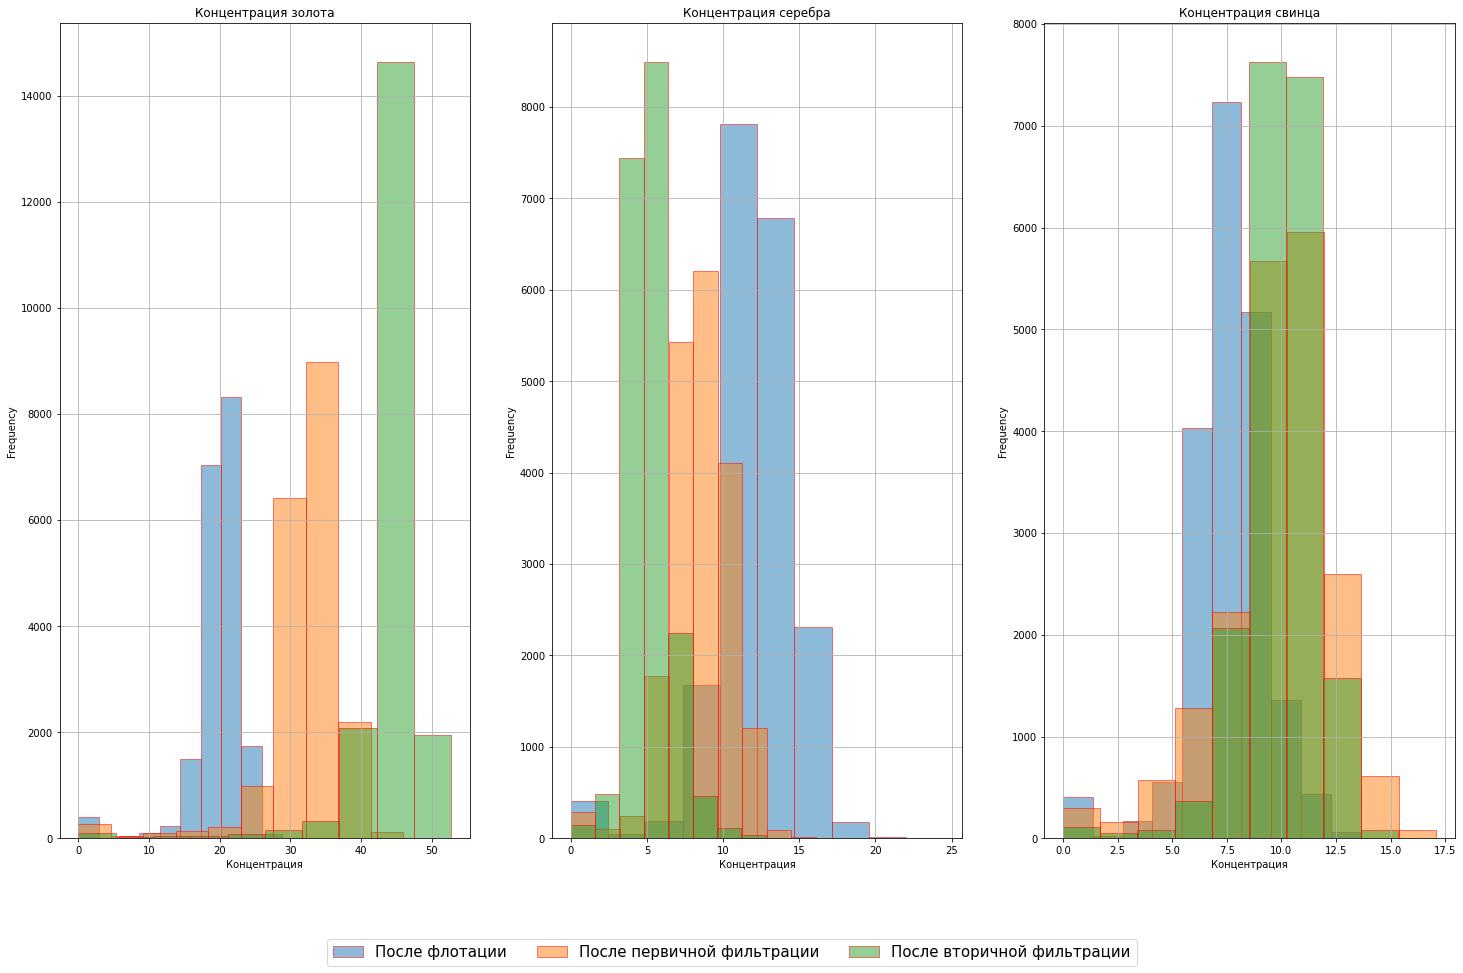

In [34]:
# список для перебора необходимых параметров
list_to_draw = ['au', 'ag', 'pb']
# список для названий
names = ['золота', 'серебра', 'свинца']
# Список для легенды
lab_list = ['После флотации', 'После первичной фильтрации', 'После вторичной фильтрации']
# название графика
title_name = 'Концентрация '
col, row = 3, 1 
fig, axes = plt.subplots(row, col, figsize = (25,15))
for i in range(col):
    # формируем необходимую выборку по веществу:
    df_test = df[['rougher.output.concentrate_'+list_to_draw[i],
                 'primary_cleaner.output.concentrate_'+list_to_draw[i],
                 'final.output.concentrate_'+list_to_draw[i]]]
    # строим совмещенные графики
    for j in range(len(list_to_draw)):
        df_test[df_test.columns[j]].plot(kind = 'hist',
                                        ax = axes[i], 
                                        alpha = .5,
                                        ec = 'red',
                                        grid = True,
                                        title = title_name + names[i])
        axes[i].set_xlabel('Концентрация')
fig.legend(loc = 'lower center', prop = {'size' : 15}, labels = lab_list, ncol = 3);

Как видно из графиков, с каждым этапом очистки сырья, у нас растет концентрация золота (Au), концентрация серебра (Ag) уменьшается с каждым этап процесса обработки руды. А концентрация свинца практически не меняется на каждом этапе процесса обработки сырья. Скорее всего, это связано с самими процессами фильтрации и химическими процессами, которые протекают во время обработки руды. Важно следующее: концентрация золота растет с каждым этапом. Производственный процесс проходит корректно.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Верно
</div>
    

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках <a id="5_2"></a>

Теперь посмотрим на распределения размеров гранул сырья, для обучающей и тестовой выборок. Нужно убедиться в том, что данные, которые мы будем передавать модели имеют идентичное распределение, чтобы не было некорректных прогнозов.

Для этого посмотрим, какие данные необходимо использовать при анализе.

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

Из всего набора данных подойдут только два признака:

* размер гранул сырья перед флотацией - `rougher.input.feed_size`;
* размер граунл сырья перед первичной фильтрацией - `primary_cleaner.input.feed_size`.

Их и будем рассматривать для данного исследования.

Для начала рассмотрим распределения выборок перед флотацией

In [36]:
def seed_check(df1: pd.DataFrame,
              df2: pd.DataFrame,
              seed: str):
    if seed == 'rougher':
        title = 'Распределение гранул сырья перед флотацией'
        xlim = (0,150)
    elif seed == 'primary_cleaner':
        title = 'Распределение гранул сырья перед первичной фильтрацией'
        xlim = (0,15)
    seed_df = pd.concat([df1[seed + '.input.feed_size'], df2[seed + '.input.feed_size']], axis = 1)
    seed_df.columns = ['Обучающая выборка', 'Тестовая выборка']
    seed_df.boxplot(figsize = (20,10))
    plt.title(title)
    plt.ylim(xlim)
    seed_df.plot(kind = 'hist',
                figsize = (20,10),
                alpha = .5,
                ec = 'red',
                xlim = xlim,
                bins = 200,
                grid = True,
                title = title)
    plt.xlabel('Размер гранул')
    return seed_df.describe()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


,Обучающая выборка,Тестовая выборка
count,14149.000000,5290.000000
mean,60.239856,55.952754
std,23.005310,19.080334
min,9.659576,0.046369
25%,48.966751,43.906504
50%,55.269784,50.846843
75%,66.007526,62.451165
max,484.967466,392.494040


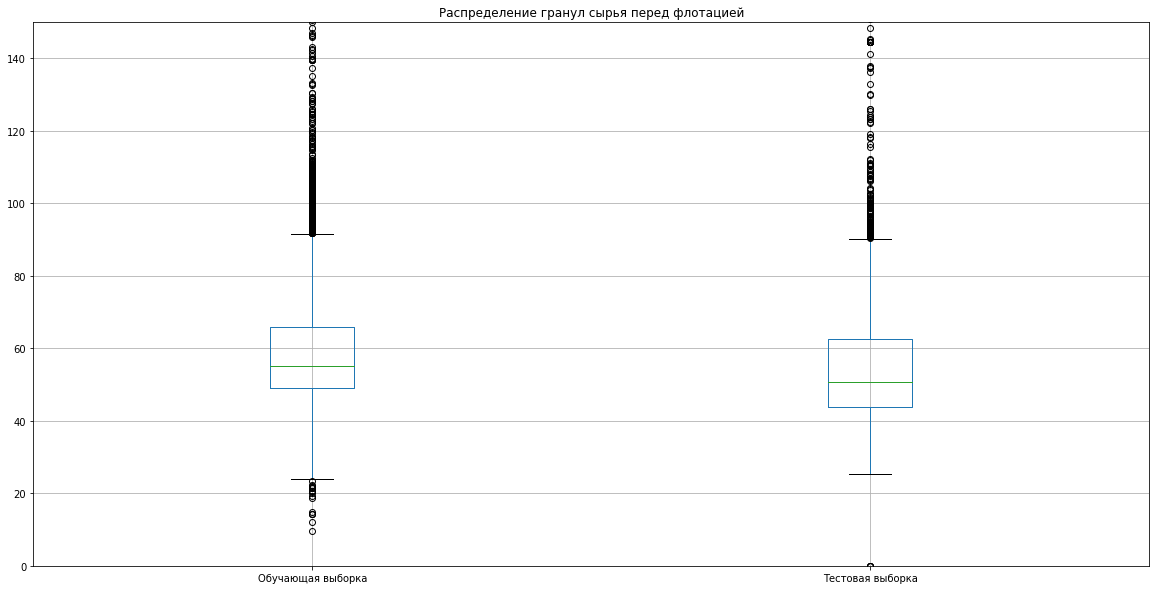

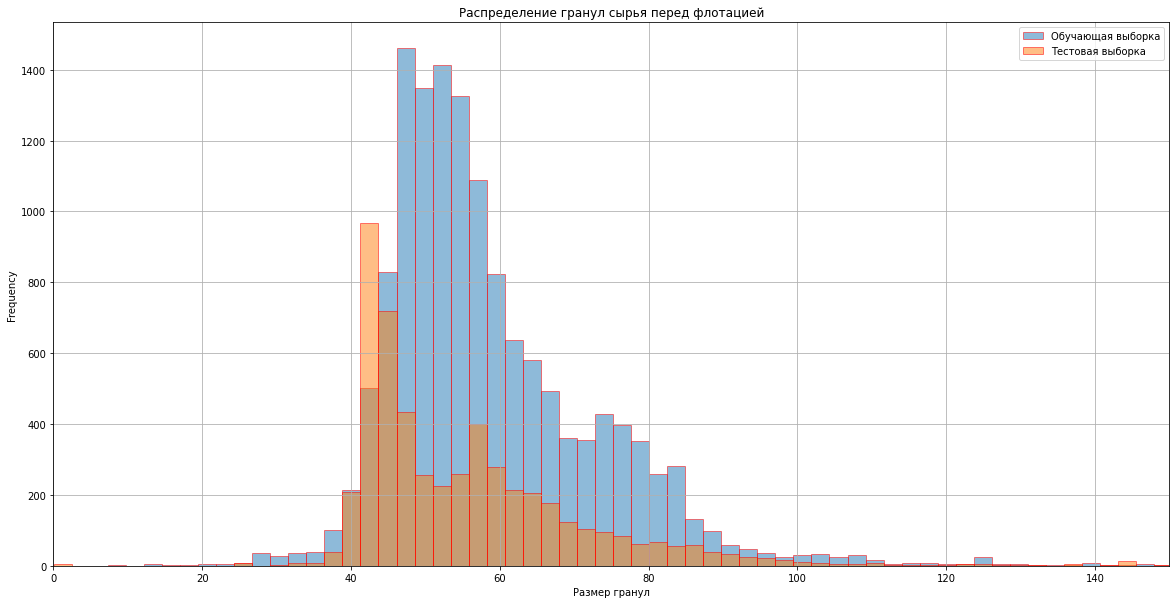

In [37]:
seed_check(train, test, 'rougher')

Видим, что разница между распределениями признака "размер гранул сырья" перед флотацией для тестовой и обучающей выборок несущественно различна.
Это можно увидеть на диаграмме размаха и гистограммах выборок. При этом по численным характеристикам видим, что станданртное отклонение, среднее, медиана и IQR отличаются несильно.

Теперь посмотрим для сырья перед первичной фильтрацией:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


,Обучающая выборка,Тестовая выборка
count,14149.000000,5290.000000
mean,7.322310,7.266339
std,0.614062,0.610219
min,1.080000,5.650000
25%,6.960000,6.890000
50%,7.290000,7.250000
75%,7.700000,7.600000
max,10.470000,15.500000


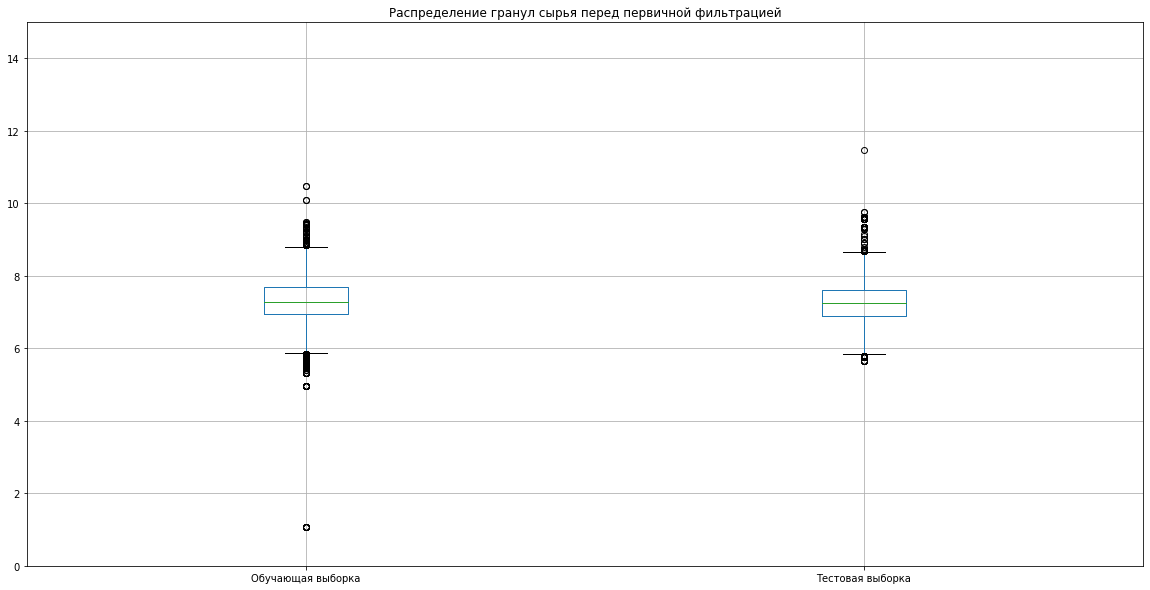

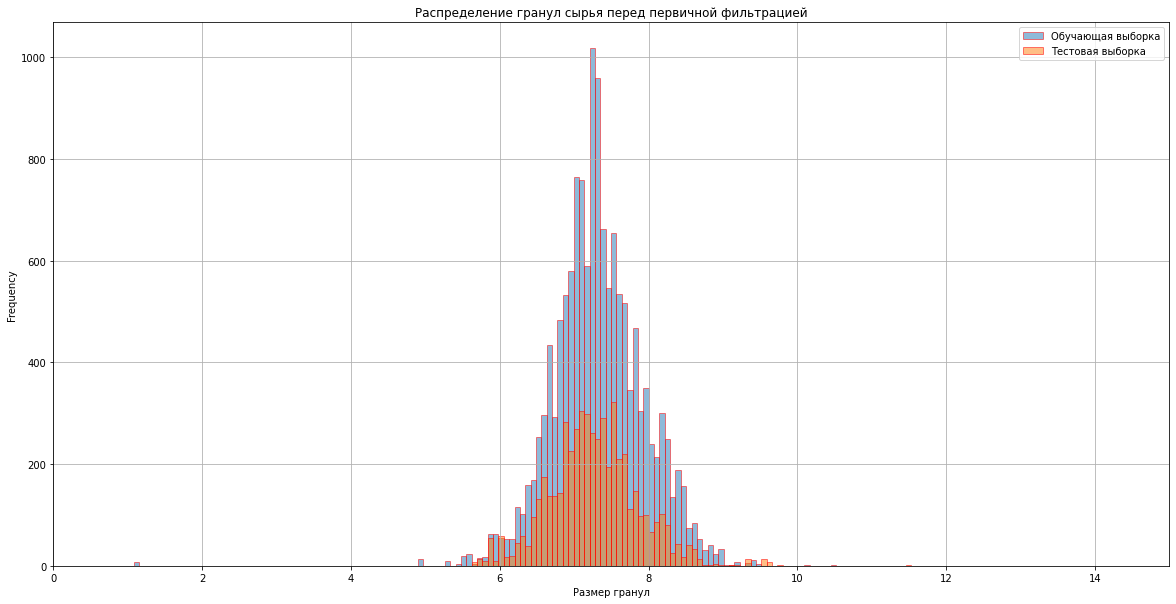

In [38]:
seed_check(train, test, 'primary_cleaner')

Аналогичную ситуацию видим и с распределениями признака перед первичной фильтрацией для тестовой и обучающей выборками. По численным характеристикам видим, что станданртное отклонение, среднее, медиана и IQR отличаются несильно.

Распределения признака "размер гранул сырья" для каждой выборки несильно отличаются друг от друга.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Между обучающей и тестовой выборками есть небольшое различие в размерах гранул сырья на этапе флотации: в обучающей выборке превалируют гранулы от 50 до 100 единиц, а также встречаются очень крупные гранулы в небольшом объёме, тогда как в тестовой выборке размер гранул распределён более равномерно.
    
Тем не менее после этапа флотации в обоих выборках остаются примерно одинаковые гранулы от 5 до 10 единиц. Таким образом, предсказательная способность модели не должна сильно ухудщаться из-за различий в выборках.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо за более корректный вывод!)
</div>

### Исследование суммарной концентрации всех веществ на разных стадиях очистки <a id="5_3"></a>

Теперь проведем анализ суммарной концентрации всех веществ на разных стадиях. Посмотрим на признаки исходных данных:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

Выберем признаки, которые нам подойдут для исследования:

* Для сырья:
    * `rougher.input.feed_ag`;
    * `rougher.input.feed_pb`;
    * `rougher.input.feed_sol`;
    * `rougher.input.feed_au`.
* Для чернового концентрата:
    * `rougher.output.concentrate_ag`;
    * `rougher.output.concentrate_pb`;
    * `rougher.output.concentrate_sol`;
    * `rougher.output.concentrate_au`.
* После первичной фильтрации:
    * `primary_cleaner.output.concentrate_ag`;
    * `primary_cleaner.output.concentrate_pb`;
    * `primary_cleaner.output.concentrate_sol`;
    * `primary_cleaner.output.concentrate_au`.
* После вторичной фильтрации:
    * `final.output.concentrate_ag`;
    * `final.output.concentrate_pb`;
    * `final.output.concentrate_sol`;
    * `final.output.concentrate_au`;
    
Теперь соберем датафрейм из этих признаков и построим распредления

In [40]:
df['Сырье'] = (
    df['rougher.input.feed_ag'] +
    df['rougher.input.feed_pb'] +
    df['rougher.input.feed_sol'] +
    df['rougher.input.feed_au']
)
df['Черновой концентрат'] = (
    df['rougher.output.concentrate_ag'] +
    df['rougher.output.concentrate_pb'] +
    df['rougher.output.concentrate_sol'] +
    df['rougher.output.concentrate_au']
)
df['Первичная фильтрация'] = (
    df['primary_cleaner.output.concentrate_ag'] +
    df['primary_cleaner.output.concentrate_pb'] +
    df['primary_cleaner.output.concentrate_sol'] +
    df['primary_cleaner.output.concentrate_au']
)
df['Вторичная фильтрация'] = (
    df['final.output.concentrate_ag'] +
    df['final.output.concentrate_pb'] +
    df['final.output.concentrate_sol'] +
    df['final.output.concentrate_au']
)

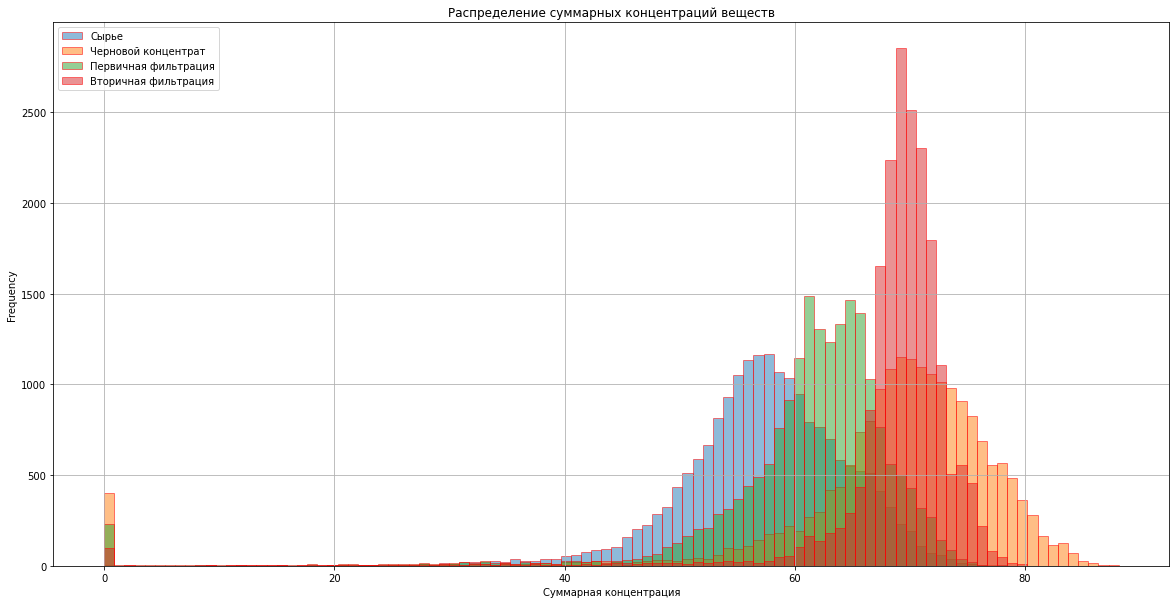

In [41]:
df[['Сырье', 
    'Черновой концентрат',
   'Первичная фильтрация',
    'Вторичная фильтрация']].plot(kind = 'hist',
                                 figsize = (20,10),
                                 grid = True,
                                 ec = 'red',
                                 bins = 100,
                                 alpha = .5)
plt.title('Распределение суммарных концентраций веществ')
plt.legend(loc = 'upper left');
plt.xlabel('Суммарная концентрация');

На основе графика распределений суммарных концентраций веществ можно сказать, что в среднем суммарная концентрация веществ меньше всего в сырье. При этом, больше всего в черновом концентрате и во вторичной фильтрации. Это говорит нам о том, что в зависимости от фильтрации и ее способа суммарная концентрация веществ может изменяться. Учитывая исследование "как меняется концентрация металлов от стадии фильтрации", можно сказать, что такие результаты получили из-за того, что в этом исследовании учитывали дополнительную концентрацию раствора `sol`, которая могла дать такие результаты.

Из распределений видим аномальные значения около нуля, посмотрим на числовые характеристики распределений:

In [42]:
df[['Сырье', 
    'Черновой концентрат',
   'Первичная фильтрация',
    'Вторичная фильтрация']].describe()

,Сырье,Черновой концентрат,Первичная фильтрация,Вторичная фильтрация
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,60.764731,68.653624
std,7.212680,12.491279,10.017271,7.427536
min,0.040000,0.000000,0.000000,0.000000
25%,53.557679,66.012495,58.929364,67.932362
50%,57.594391,70.181495,62.497674,69.598444
75%,61.953459,74.356904,65.667336,71.368472
max,76.978947,88.140119,80.749343,80.210644


Видим, что у нас есть значения, равные нулю. При этом их количество меньше 500 (приблизительно 400 значений). Это означает, что были моменты, когда после фильтрации мы получили ничего в прямом смысле. Такие значения исказаят обучение модели и нужно отфильтровать.

In [43]:
df = df[(df['Сырье'] >= 1) &
        (df['Черновой концентрат'] >= 1) &
       (df['Первичная фильтрация'] >= 1) &
       (df['Вторичная фильтрация'] >= 1)]

Посмотрим, что у нас получилось:

In [44]:
df[['Сырье', 
    'Черновой концентрат',
   'Первичная фильтрация',
    'Вторичная фильтрация']].describe()

,Сырье,Черновой концентрат,Первичная фильтрация,Вторичная фильтрация
count,18722.000000,18722.000000,18722.000000,18722.000000
mean,57.350936,69.633481,61.467680,69.035859
std,7.089930,7.651370,7.445848,5.458724
min,8.072476,2.016647,1.083422,1.976540
25%,53.552246,66.389891,59.094492,67.946259
50%,57.600880,70.345534,62.533581,69.609421
75%,61.956159,74.460165,65.658261,71.388643
max,76.978947,88.140119,80.749343,80.210644


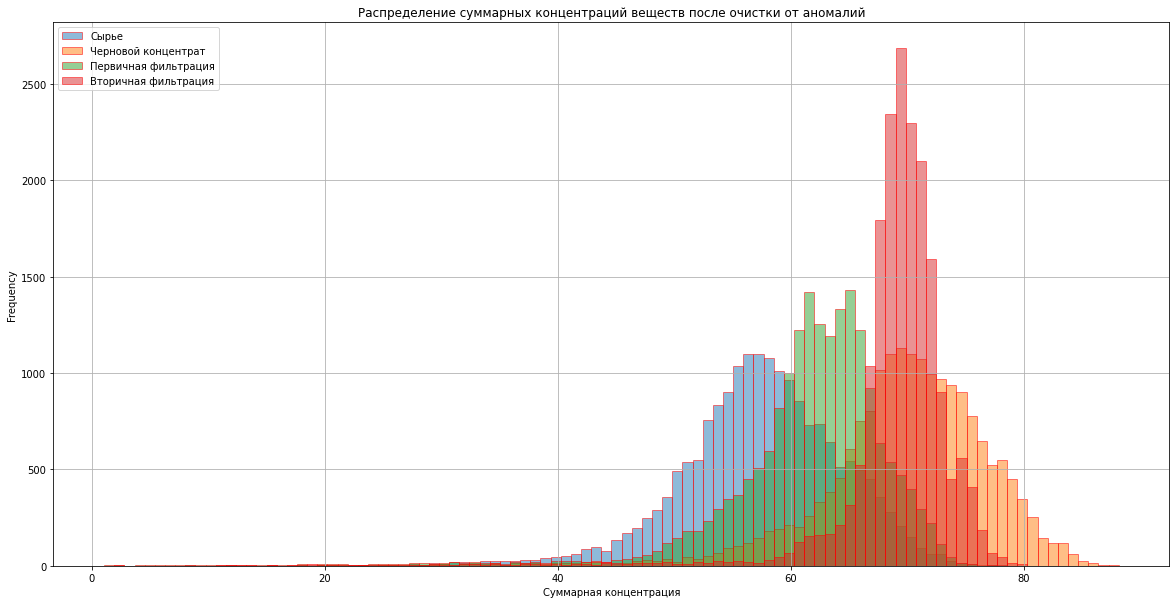

In [45]:
df[['Сырье', 
    'Черновой концентрат',
   'Первичная фильтрация',
    'Вторичная фильтрация']].plot(kind = 'hist',
                                 figsize = (20,10),
                                 grid = True,
                                 ec = 'red',
                                 bins = 100,
                                 alpha = .5)
plt.title('Распределение суммарных концентраций веществ после очистки от аномалий')
plt.legend(loc = 'upper left');
plt.xlabel('Суммарная концентрация');

Видим, что от аномальных значений мы избавились. Теперь осталось отфильтровать обучающую и тестовые выборки от аномальных значений.

In [46]:
test = test[test['date'].isin(df['date'])]

In [47]:
train = train[train['date'].isin(df['date'])]

Убедимся, что пропусков нет

In [48]:
test.isna().mean()

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


In [49]:
train.isna().mean()

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


Сбросим индексы в обучающей и тестовой выборках:

In [50]:
test = test.reset_index(drop = True)
train = train.reset_index(drop = True)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Молодец, что "убил" нулевые аномалии. Дело в том, что хоть грамм чего-нибудь но есть в "суммарной руде"- соль+золото+серебро+свинец - точно что-то должно быть.. А если мы имеем ноль, значит большая вероятность неточности измерений. Общая идея какая с суммарной концентрацией: отдельно по каждой руде нуль может быть (взяли лопату руды - и нет там золота - не всегда же есть крупинки..). А вот нуль суммарно - это уже вряд ли (в этой лопате хоть что-то но будет).
</div>


### Вывод

Провели исследовательский анализ данных, в результате которого установили:

* С каждым этапом очистки сырья, у нас растет концентрация золота (Au), концентрация серебра (Ag) уменьшается с каждым этап процесса обработки руды. А концентрация свинца практически не меняется на каждом этапе процесса обработки сырья.
* Распределения признака "размер гранул сырья" для каждой выборки несильно отличаются друг от друга.
* Провели исследование распределений суммарных концентраций веществ. Обнаружили аномальные нулевые значения и избавились от них.

После того, как провели исследование данных. Приступим к обучению модели.

## Обучение моделей <a id="6"></a>

Для начала сформируем признаки (features) и целевые признаки (target) для обучающей и тестовой выборок. А также удалим лишние для обучения признаки (столбец `date`).

Напомним:
* Целевые признаки:
    * эффективность обогащения чернового концентрата `rougher.output.recovery`;
    * эффективность обогащения финального концентрата `final.output.recovery`.
* Обучающие признаки - все остальное

In [51]:
# формируем параметры из обучающей выборки для машинного обучения
train_features = train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)
train_target_rougher = train['rougher.output.recovery']
train_target_final = train['final.output.recovery']

In [52]:
# формируем параметры из тестовой выборки для машинного обучения
test_features = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)
test_target_rougher = test['rougher.output.recovery']
test_target_final = test['final.output.recovery']

Проверим корректность полученных параметров:

In [53]:
print('Train:', train_features.shape, 
      train_target_rougher.shape,
      train_target_final.shape, sep = '\n')

Train:
(13599, 52)
(13599,)
(13599,)


In [54]:
print('Test:', test_features.shape, 
      test_target_rougher.shape,
      test_target_final.shape, sep = '\n')

Test:
(5123, 52)
(5123,)
(5123,)


Получили необходимые параметры.

### Реализация метрики sMAPE <a id="6_1"></a>

Для начала рассмотрим, что такое метрика sMAPE:

$$sMAPE =  \frac{1}{N}\sum_{i = 1}^{N}\frac{\left| y_{i} - \hat{y}_{i} \right|}{\frac{\left| y_{i}\right|+\left| \hat{y}_{i}\right|}{2}}\cdot 100\%$$

Где:

$y_{i}$ - значение целевого признака;

$\hat{y}_{i}$ - значение предсказания:

Итоговое $sMAPE$ представляет собой:

$$sMAPE_{total} = 0.25\% \cdot sMAPE_{rougher} + 0.75 \% \cdot sMAPE_{final}$$ 

Где:

$sMAPE_{rougher}$ - значение метрики $sMAPE$ для чернового концентрата;

$sMAPE_{final}$ - значение метрики $sMAPE$ после очистки.

Теперь реализуем нашу функцию $sMAPE$ и $sMAPE_{total}$

In [55]:
def smape(target: pd. Series, predictions: pd.Series):
    # числитель:
    num = abs(target - predictions)
    # знаменатель:
    denum = (abs(target) + abs(predictions)) / 2
    # сумма
    sum = (num/denum).sum()
    # общий результат
    result = (1/len(target)) * sum * 100
    return result

In [56]:
def smape_total(smape_rougher : float , smape_final: float):
    return  .25 * smape_rougher + .75 * smape_final

После того, как написали функцию подсчета метрики, перейдем к обучению моделей.

Для задачи регресии выбрали две лучшие модели:

* Модель случайного леса;
* Модель линейной регрессии.

### Обучение модели <a id="6_2"></a>

Прежде всего подберем наилучшие гиперпараметры.

In [57]:
# формируем метрику
# которую будем использовать 
# на кросс-валидации и поиске гипепараметров
scorer = make_scorer(smape, greater_is_better=False)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Абсолютно верно, молодец, что использовал greater_is_better=False, так как по умолчанию функция make_scorer максимизирует
</div>


In [58]:
# параметры, которые мы перебираем
parameters = {
    'n_estimators': range(10, 51,10),
    'max_depth': range(1,7,2)
}

In [59]:
# гиперпараметры, когда целевой признак - черновой концентрат
model = RandomForestRegressor(random_state=12345)
grid_rougher = GridSearchCV(model, parameters, cv = 5, scoring = scorer)
grid_rougher.fit(train_features, train_target_rougher)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 7, 2),
                         'n_estimators': range(10, 51, 10)},
             scoring=make_scorer(smape, greater_is_better=False))

In [60]:
# гиперпараметры, когда целевой признак - финальный концентрат
grid_final = GridSearchCV(model, parameters, cv = 5, scoring = scorer)
grid_final.fit(train_features, train_target_final)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 7, 2),
                         'n_estimators': range(10, 51, 10)},
             scoring=make_scorer(smape, greater_is_better=False))

**Для ревьюера:** поиск гиперпараметров занимает суммарно 10 минут (5 минут на каждый)


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b>  Ускоренная версия GridsearchCV https://towardsdatascience.com/20x-times-faster-grid-search-cross-validation-19ef01409b7c. Обьемная статья с огромным количеством библиотек для подбора гиперпараметров: https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide/.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Ого, спасибо большое! Посмотрел на бенчмарк из первой ссылки - результаты впечатляют.
</div>

После того, как определили наилучшие гиперпараметры модели машинного обучения, обученими наши модели и посчитаем нашу метрику на кросс-валидации.

Модель линейной регрессии:

In [61]:
model = LinearRegression()
# процедура кросс-валидации
# когда целевой признак - черновой концентрат
linear_cross_rougher = cross_val_score(model, 
                                       train_features, 
                                       train_target_rougher,
                                       scoring = scorer,
                                       cv = 5)
smape_rougher = linear_cross_rougher.mean()

# когда целевой признак - финальный концентрат
linear_cross_final = cross_val_score(model, 
                                       train_features, 
                                       train_target_final,
                                       scoring = scorer,
                                       cv = 5)
smape_final = linear_cross_final.mean()
# считаем sMAPE total
smape_t = smape_total(smape_rougher, smape_final)
print(f'sMAPE total LinearRegression: {smape_t:.4f}')

sMAPE total LinearRegression: -10.0911


Модель случайного леса:

In [62]:
# модель которую получили на основе перебора гиперпараметров
# данная модель - для чернового концентрата
model_rougher = grid_rougher.best_estimator_
# процедура кросс-валидации
# когда целевой признак - черновой концентрат
r_f_cross_rougher = cross_val_score(model_rougher,
                                    train_features,
                                    train_target_rougher,
                                    scoring = scorer,
                                    cv = 5)
smape_rougher = r_f_cross_rougher.mean()

# модель которую получили на основе перебора гиперпараметров
# данная модель - для финального концентрата
model_final = grid_final.best_estimator_
# процедура кросс-валидации
# когда целевой признак - финальный концентрат
r_f_cross_final = cross_val_score(model_final,
                                    train_features,
                                    train_target_final,
                                    scoring = scorer,
                                    cv = 5)
smape_final = r_f_cross_final.mean()
smape_t = smape_total(smape_rougher, smape_final)
print(f'sMAPE total RandomForest: {smape_t:.4f}')

sMAPE total RandomForest: -8.3250


Видим, что полученное значение метрики $sMAPE_{total}$ при кросс-валидации лучше всего у модели Случайного Леса. 

Ее мы и будем использовать при финальном тестировании модели.

### Финальное тестирование модели <a id="6_3"></a>

In [63]:
# модель которую получили на основе перебора гиперпараметров
# данная модель - для чернового концентрата
model_rougher = grid_rougher.best_estimator_
model_rougher.fit(train_features, train_target_rougher)
prediction_rougher = model_rougher.predict(test_features)
smape_rougher = smape(test_target_rougher, prediction_rougher)

# модель которую получили на основе перебора гиперпараметров
# данная модель - для финального концентрата
model_final = grid_final.best_estimator_
model_final.fit(train_features, train_target_final)
prediction_final = model_final.predict(test_features)
smape_final = smape(test_target_final, prediction_final)

smape_t = smape_total(smape_rougher, smape_final)
print(f'sMAPE total on тестовой выборке: {smape_t:.4f}')

sMAPE total on тестовой выборке: 7.3063


Получили итоговое значение метрики $sMAPE$ для тестовой выборки. Но как понять, какой результат мы получили? Проверим модель на адекватность.

### Проверка модели на адекватность <a id="6_4"></a>

In [64]:
# выбралы самую простую модель, которая предсказыввает среднее значение целевого признака
model_rougher = DummyRegressor(strategy = 'mean')
model_rougher.fit(train_features, train_target_rougher)
prediction_rougher = model_rougher.predict(test_features)
smape_rougher = smape(test_target_rougher, prediction_rougher)

model_final = DummyRegressor(strategy = 'mean')
model_final.fit(train_features, train_target_final)
prediction_final = model_final.predict(test_features)
smape_final = smape(test_target_final, prediction_final)

smape_t = smape_total(smape_rougher, smape_final)
print(f'sMAPE total dummy: {smape_t:.4}')

sMAPE total dummy: 7.779


Видим, что метрика sMAPE для тестовой выборке лучше показателя sMAPE модели, которая прогнозирует среднее значение целевого признака.
Модель предсказывает лучше константной модели - проверка на адекватность пройдена.

## Общий вывод

Была дана задача: 

---

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

---

Для выполнения задания заказчиком были предоставлены данные с параметрами добычи и очистки. 

В процессе знакомства с данными выполнили следующие пункты:

*   Познакомились с обучающими, тестовыми и исходными данными;
*   Определили основные этапы процесса добычи золота из руды;
*   Из дополнительной информации определили, какие данные предоставил заказчик и из чего состоят эти данные;
* Как индексируются предоставленные наборы данных.

После знакомства с данными оценили корректность представленных данных. Для этого самостоятельно посчитали коэффициенты эффективности обогащения и установили, что данные заказчика верны.

Далее ознакомились с тестовой выборкой и определили, что в ней отстутствуют целевые признаки, имеются пропуски в данных, а также один из признаков имел некорректный тип данных. Сделали вывод о том, что данные для проведения исследования и обучения модели не готовы. После этого приступили к предобработке данных.

В процессе предобработки данных исправили следующие проблемы:

* Добавлены целевые признаки для тестовой выборки;
* Убраны лишние для обучения признаки в обучающей выборке;
* Тип данных `date` приведен к соответствующему типу;
* Пропуски обработаны с помощью заполения ближайшим значением по индексу.

Далее приступили к исследованию данных, в результате которого сделали следующие выводы:

* С каждым этапом очистки сырья, у нас растет концентрация золота (Au), концентрация серебра (Ag) уменьшается с каждым этап процесса обработки руды. А концентрация свинца практически не меняется на каждом этапе процесса обработки сырья.
* Распределения признака "размер гранул сырья" для каждой выборки несильно отличаются друг от друга.
* Провели исследование распределений суммарных концентраций веществ. Обнаружили аномальные нулевые значения и избавились от них.

После проведения исследования приступили к обучению моделей машинного обучения.
В процессе обучения выполнили следующие задачи:

* Реализовали метрику sMAPE;
* Получили все необходимые параметры моделей машинного обучения;
* Определили наилучшие гиперпараметры модели;
* Посчитали необходимую метрику с помощью кросс-валидации;
* Выбрали наиболее подходящую модель;
* Провели финальное тестирование модели;
* Сделали проверку на адекватность.

В результате проверки на адекватность определили, что выбранная модель - адекватна, так как она предсказывает результаты лучше константной модели.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Спасибо тебе за проделанную работу! Мне ОЧЕНЬ понравился твой проект. Полностью описан ход решения, даны все необходимые пояснения, выводы полные и логичные. Ещё хочу отметить качественную визуализацию. 
    
Естественно работа зачтена, отправляю обратно, чтобы ты мог прочитать мои комментарии и задать какие-то вопросы, может хочешь какую-то подборку статей.
    
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Вика, большое спасибо за фидбек! Да есть несколько вопросов:
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Первый вопрос: GridSearchCV и cross_val_score уместно ли использовать вместе? Так как уже с помощью GridSearch мы определяем наилучшие гиперпараметры, и нам попросту остается оценить качество модели с помощью определенной метрики (тот же sMAPE).
Но вопрос: что же лучше использовать? GridSearch или cross_val_score? 
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Внутри GridSearchCV уже встроена кросс-валидация, поэтому мне кажется целесообразным использовать gridsearch на обучающей выборке и провести тестирование с помощью полученных параметров на тестовой.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Второй вопрос: спасибо тебе за рекомендации по оптимизации процесса обучения) Можно посоветовать что-нибудь дополнительно касаемо оптимазции?
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> На этот вопрос к сожалению не могу ответить, так как не совсем поняла о какой именно оптимизации идёт речь
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Третий вопрос: как часто на практике приходится реализовывать свои метрки? Где их можно найти на языке математики?
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Мне кажется, что чаще всего всё-таки используются стандартные метрики, например для оценки регрессии они следующие: https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/ (ссылка работает через VPN). 
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Четвертый вопрос: можешь посоветовать какую-нибудь интересную литературу/статьи/видеоролики/ноутбуки по машинному обучению? 
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Очень рекомендую следующие блоги:
    
https://www.analyticsvidhya.com/blog/
    
https://towardsdatascience.com/
    
https://machinelearningmastery.com/ 
    
Мне очень понравился курс от IBM на курсере https://ru.coursera.org/professional-certificates/ibm-machine-learning, но в связи с нынешними событиями курсера закрыта для студентов из России.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Пятый вопрос: чтобы бы ты хотела бы еще посоветовать из статей для практики?
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> 
    
https://towardsdatascience.com/manipulating-machine-learning-results-with-random-state-2a6f49b31081
    
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/.
    
https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
    
https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

https://machinelearningmastery.com/feature-selection-machine-learning-python/
    
https://towardsdatascience.com/7-considerations-before-pushing-machine-learning-models-to-production-efab64c4d433
    
https://rukshanpramoditha.medium.com/top-trending-machine-learning-algorithms-in-2022-96199ef210c3
    
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Шестой вопрос: какие pet-projects посоветуешь реализовать, чтобы можно было их приложить в портфолио? Kaggle тоже можно, но можешь, пожалуйста, поделиться своим опытом? 
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Я бы тут в первую очередь отталкивалась от твоих интересов, т.е. в каком направлении ты хотел бы работать. Чтобы портфолио было релевантно позиции. Например, на свою текущую работу я во многом устроилась из-за своей магистерской работы. Я работаю в американской криптовалютной фирме, магистерская работа у меня была исследование влияния масс и сошиал медиа на колебания курсов криптовалют. Поэтому я бы не рекомендовала использовать какие-то проекты, которые вот прям надо реализовать, а ориентировалась на себя. Поэтому выбираешь направление, смотришь какие проблемы есть в этой сфере, и пытаешься их решить. 
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Седьмой вопрос: может, не по теме, но хотелось бы узнать актуальные критерии/знания/проекты для junior/junior+ позиций.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> развитые soft skills, это правда ничуть не менее важно, чем техника, английский язык, стремление и желание постоянно учиться. Технические требования напрямую зависят от фирмы, потому что под должностью data scientist может скрываться что угодно =) 
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Удачи в будущих проектах и работе =)
</div>